In [1]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y 

array([ 6, 11, 14,  5,  0])

In [2]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


In [4]:
#There are three methods to apply kernel on the matrix, with padding (full), 
#with padding(same) and without padding(valid):
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  #now, because of the zero padding, the final dimension of the array is bigger
y  

array([ 6, 14, 34, 34,  8])

In [5]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # it is same as zero padding, but with returns an ouput with the same length as max of x or h
y  

array([ 6, 14, 34, 34])

In [6]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary of 
                                # h will not be used in the calculation of the convolution
                                # in the next example we will understand why we used the argument valid
y  

array([14, 34, 34])

In [7]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [8]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


In [9]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 0.6413787 ]
   [-0.14799297]
   [-0.98086876]
   [ 0.21913289]
   [ 1.771304  ]
   [-0.00731435]
   [ 0.30636454]
   [-0.38038063]
   [ 0.6759119 ]
   [-1.6014041 ]]

  [[-0.9850314 ]
   [ 2.0881295 ]
   [-2.523095  ]
   [ 1.7054714 ]
   [-0.64016503]
   [-0.27901983]
   [ 0.33168986]
   [-0.34947917]
   [ 1.4150448 ]
   [ 0.95686513]]

  [[ 1.347411  ]
   [ 1.1963737 ]
   [-1.3544331 ]
   [-0.2874755 ]
   [ 0.37903237]
   [-1.3902652 ]
   [-0.227271  ]
   [ 0.9456311 ]
   [-1.210412  ]
   [ 0.6619633 ]]

  [[-0.9821673 ]
   [-0.08816487]
   [-1.0572586 ]
   [-0.13636342]
   [ 0.3602351 ]
   [-0.84198064]
   [ 1.5195698 ]
   [-1.411271  ]
   [ 0.5726281 ]
   [ 0.8250925 ]]

  [[-0.09139623]
   [ 1.1981295 ]
   [-1.0030832 ]
   [-0.90488625]
   [ 0.09097803]
   [ 0.25752315]
   [-2.0518575 ]
   [-0.28853372]
   [ 0.21885234]
   [ 1.5087055 ]]

  [[ 0.49017903]
   [-1.0812528 ]
   [ 0.2106833 ]
   [ 0.73523885]
   [ 0.30610695]
   [-0.48791894]
   [ 0.41824678]
   [-2.243225


 Original type: <PIL.Image.Image image mode=L size=259x194 at 0x1F13B20F908> 


After conversion to numerical representation: 

 array([[118, 117, 117, ..., 135, 135, 134],
       [118, 117, 117, ..., 135, 135, 134],
       [118, 118, 117, ..., 135, 135, 134],
       ...,
       [ 89,  89,  89, ...,  82,  82,  82],
       [ 89,  89,  89, ...,  80,  80,  80],
       [ 89,  89,  89, ...,  80,  80,  80]], dtype=uint8)

 Input image converted to gray scale: 



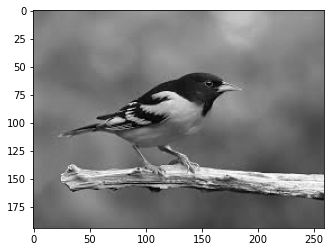

In [14]:

#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [15]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


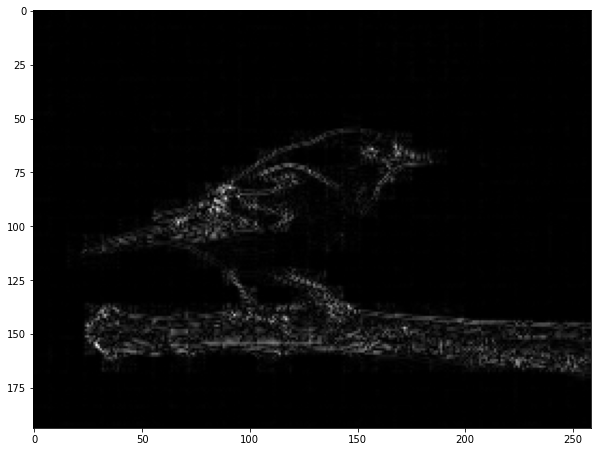

In [16]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In [17]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


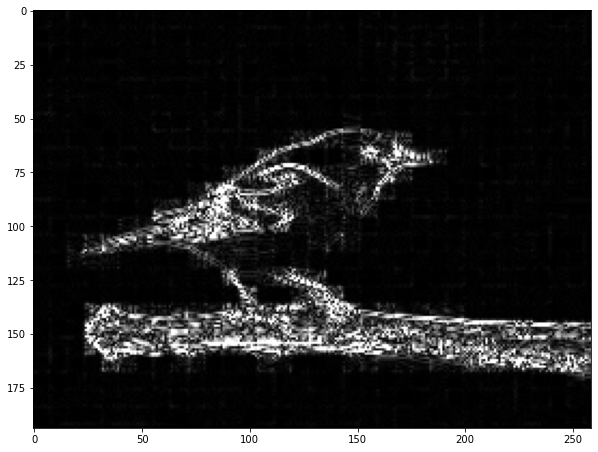

In [18]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')